# Sheet#4 Clustering Evaluation

## 1. Perform clustering on the following data

In [41]:
#imports cell 
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from copy import deepcopy
from sklearn.metrics.pairwise import rbf_kernel as rbf
from sklearn.neighbors import NearestNeighbors as nn
import pandas as pd 
from math import sqrt, floor

In [2]:
#load data on 2D graph onto 2D array for usage.
clustering_dataSet = np.array([[2,4],[3,3],[3,4],[5,4],[5,6],[5,8],[6,4],[6,5],[6,7],[7,3],[7,4],[8,2],[9,4],[10,6],[10,7],[10,8],[11,5],[11,8],[12,7],[13,6],[13,7],[14,6],[15,4],[15,5]])

### a. Using Kmeans: set K=2,3,4,5,6. Report different clustering results.

In [38]:
def naive_sharding(ds, k):
    """
    Create cluster centroids using deterministic naive sharding algorithm.
    
    Parameters
    ----------
    ds : numpy array
        The dataset to be used for centroid initialization.
    k : int
        The desired number of clusters for which centroids are required.
    Returns
    -------
    centroids : numpy array
        Collection of k centroids as a numpy array.
    """
    
    n = np.shape(ds)[1]
    m = np.shape(ds)[0]
    centroids = np.mat(np.zeros((k,n)))

    # Sum all elements of each row, add as col to original dataset, sort
    composite = np.mat(np.sum(ds, axis=1))
    ds = np.append(composite.T, ds, axis=1)
    ds.sort(axis=0)

    # Step value for dataset sharding
    step = floor(m/k)

    # Vectorize mean ufunc for numpy array
    vfunc = np.vectorize(_get_mean)

    # Divide matrix rows equally by k-1 (so that there are k matrix shards)
    # Sum columns of shards, get means; these columnar means are centroids
    for j in range(k):
        if j == k-1:
            centroids[j:] = vfunc(np.sum(ds[j*step:,1:], axis=0), step)
        else:
            centroids[j:] = vfunc(np.sum(ds[j*step:(j+1)*step,1:], axis=0), step)

    return centroids

def _get_mean(sums, step):
    """
    Vectorizable ufunc for getting means of summed shard columns.
    
    Parameters
    ----------
    sums : float
        The summed shard columns.
    step : int
        The number of instances per shard.
    Returns
    -------
    sums/step (means) : numpy array
        The means of the shard columns.
    """

    return sums/step

In [44]:
#my k-means implementation
def kmeans(data, num_clusters = 2, tolerance=0.0001, max_iter = 300, init_seed = None):
    iter_num = 0
    # Number of training data
    n = data.shape[0]
    # Number of features in the data
    c = data.shape[1]
    # Generate random centers, here i use standard devation 
    #and mean to ensure it represents the whole data
    if(init_seed is None):
        mean = np.mean(data, axis = 0)
        std = np.std(data, axis = 0)
        centroids = np.random.randn(num_clusters,c)*std + mean
    elif(init_seed == 'naive_sharding'):
        centroids = naive_sharding(data,num_clusters)
        print(centroids)
    else:
        centroids = init_seed
    print(centroids)
    # to store old centers        
    old_centroids = np.zeros(centroids.shape) 
    # Store new centers
    new_centroids = deepcopy(centroids) 
    #generate error vector
    error = np.linalg.norm(new_centroids - old_centroids)
    print(error)
    #create clusters array
    clusters = np.zeros(n)
    #create distaces array
    distances = np.zeros((n,num_clusters))
    # When, after an update, the estimate of that center stays the same, exit loop
    while error > tolerance and iter_num < max_iter:
        iter_num +=1
        # Measure the distance to every center
        for i in range(num_clusters):
            distances[:,i] = np.linalg.norm(data - new_centroids[i], axis=1)
        # Assign all training data to closest center
        clusters = np.argmin(distances, axis = 1)
        print(clusters)
        old_centroids = deepcopy(new_centroids)
        # Calculate mean for every cluster and update the center
        for i in range(num_clusters):
            new_centroids[i] = np.mean(data[clusters == i], axis=0)
            #np.nan_to_num(new_centroids[i], copy=False)
        print(new_centroids)
        error = np.linalg.norm(new_centroids - old_centroids)
        print(error)
    return new_centroids,clusters

[[ 5.25        3.83333333]
 [11.91666667  6.75      ]]
[[ 5.25        3.83333333]
 [11.91666667  6.75      ]]
15.160026018740497
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
[[ 5.53846154  4.46153846]
 [12.18181818  6.27272727]]
0.8808781552861388
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
[[ 5.53846154  4.46153846]
 [12.18181818  6.27272727]]
0.0
______
[[ 4.375  3.5  ]
 [ 8.375  5.125]
 [13.     7.25 ]]
[[ 4.375  3.5  ]
 [ 8.375  5.125]
 [13.     7.25 ]]
18.691157668801576
[0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2]
[[ 4.28571429  4.28571429]
 [ 8.11111111  5.11111111]
 [12.875       6.375     ]]
1.2150716540453903
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2]
[[ 4.375       4.75      ]
 [ 8.14285714  4.71428571]
 [12.66666667  6.22222222]]
0.6698919289878432
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[ 4.55555556  5.        ]
 [ 8.2         3.8       ]
 [12.4         6.3       ]]
1.0057059589852908
[0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2]
[[ 4.

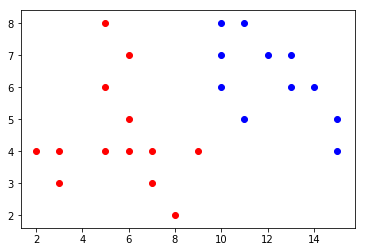

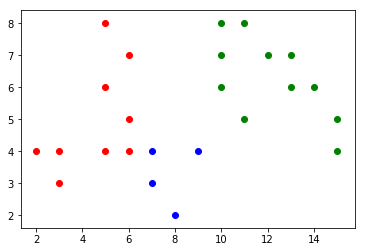

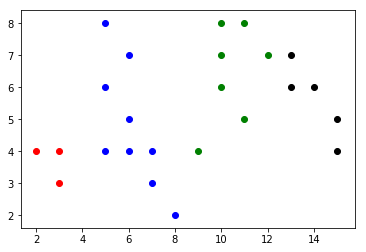

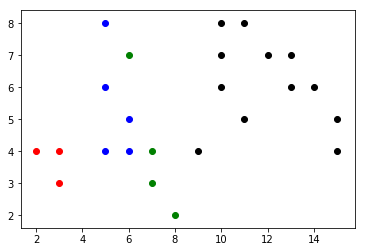

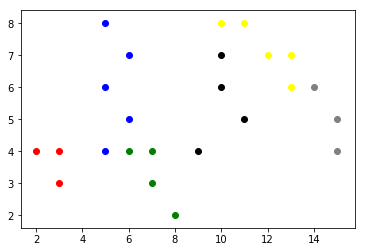

<Figure size 432x288 with 0 Axes>

In [46]:
colors=['red', 'blue', 'green','black','yellow','gray']
kmeans_clusters = []
for k in range(2,7):
    centroids,clusters = kmeans(clustering_dataSet,num_clusters=k,init_seed='naive_sharding')
    print("______")
    kmeans_clusters.append(clusters)
    # Plot the data and the centers generated as random
    for i in range(clustering_dataSet.shape[0]):
        plt.scatter(clustering_dataSet[i, 0], clustering_dataSet[i,1],color = colors[clusters[i]]);
    #plt.scatter(centroids[:,0], centroids[:,1], marker='*', c='g');
    plt.figure();

### b. K-ways normalized: cut k=2,3,4,5,6

In [22]:
def SpectralClustering(data, num_clusters=2, affinity='rbf', gamma=1.0, num_neighbors=1):
    if(affinity == 'rbf'):
        sim_matrix = rbf(data,data,gamma)
    elif(affinity == 'knn'):
        nearest_neigbhor = nn(n_neighbors=num_neighbors)
        nearest_neigbhor.fit(data)
        sim_matrix = nearest_neigbhor.kneighbors_graph(data, mode='connectivity').toarray()
        
    deg_matrix = np.diag(np.sum(sim_matrix, axis=1))
    laplace_matrix = deg_matrix - sim_matrix
    asym_laplace_matrix = np.dot(np.linalg.inv(deg_matrix),laplace_matrix) 
    eig_values,eig_vectors = np.linalg.eig(asym_laplace_matrix)
    idx = np.real(eig_values).argsort()[:num_clusters]
    eig_vectors = np.real(eig_vectors[:,idx])
    rows_norm = np.linalg.norm(eig_vectors, axis=1)
    normalized_eig_vectors = (eig_vectors.T / rows_norm).T
    centroids,clusters = kmeans(normalized_eig_vectors, num_clusters=num_clusters)
    return normalized_eig_vectors,centroids,clusters

#### i. Use RBF kernel with gamma = {0.01,0.1}. Report the different clustering results.

In [23]:
spectral_rbf_clusters = []
for gamma in [0.01,0.1]:
    for k in range(2,7):
        new_data,centroids,clusters = SpectralClustering(clustering_dataSet,num_clusters=k, affinity='rbf', gamma= gamma)
        print("______")
        spectral_rbf_clusters.append(clusters)
        #print("For K = ",k,"and gamma = ",gamma,"\nClusters Vector is \n",clusters)

[[ 0.93776607 -0.95498385]
 [ 0.84839741 -1.27387503]]
2.0332080829844994
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0.75638154 0.00911648]
 [0.         0.        ]]
1.8179454187609363
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0.75638154 0.00911648]
 [0.         0.        ]]
0.0
______
[[ 0.60324882 -0.10962647  0.35319053]
 [ 0.60356059 -0.24259078  0.07386747]
 [ 0.5105554   0.42740019 -0.81731183]]
1.4284953982556927
[0 0 0 0 2 2 0 2 2 0 0 0 0 1 2 2 1 1 1 1 1 1 0 0]
[[ 0.61153425  0.28921876  0.4726498 ]
 [ 0.67166126 -0.59747323 -0.15927356]
 [ 0.60800696  0.20410125 -0.6273231 ]]
0.6736509584874638
[0 0 0 0 2 2 0 2 2 0 0 0 0 1 2 2 1 2 1 1 1 1 1 1]
[[ 0.65864152  0.49657113  0.43384241]
 [ 0.62047898 -0.63342396  0.1151258 ]
 [ 0.59784883  0.11742182 -0.64361338]]
0.3657992447375523
[0 0 0 0 2 2 0 0 2 0 0 0 0 2 2 2 1 2 1 1 1 1 1 1]
[[ 0.67431483  0.50230399  0.37361795]
 [ 0.58748526 -0.6751901   0.18848903]
 [ 0.60300031 -0.0104297  -0.67647262]]
0.1719678485181

/home/zawawy/Public/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/zawawy/Public/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/zawawy/Public/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/zawawy/Public/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/zawawy/Public/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/zawawy/Public/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=r

#### ii. Use Similarity graph as the {3,5}-NN graph. Where Sim(xi,xj)=1 iff xj is one of the nearest three points to xi (or vise versa ). Report different clustering results.

In [7]:
spectral_knn_clusters = []
for j in [3,5]:
    for k in range(2,7):
        new_data,centroids,clusters = SpectralClustering(clustering_dataSet,num_clusters=k, affinity='knn', num_neighbors= j)
        spectral_knn_clusters.append(clusters)
        print("For K = ",k,"and NN = ",j,"\nClusters Vector is \n",clusters)

For K =  2 and NN =  3 
Clusters Vector is 
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
For K =  3 and NN =  3 
Clusters Vector is 
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2 2 2 2]
For K =  4 and NN =  3 
Clusters Vector is 
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 2 2 2 2 0 0]
For K =  5 and NN =  3 
Clusters Vector is 
 [0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 0 0]
For K =  6 and NN =  3 
Clusters Vector is 
 [3 3 3 1 2 2 1 1 2 1 1 1 1 0 0 0 0 0 5 5 5 5 5 5]
For K =  2 and NN =  5 
Clusters Vector is 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
For K =  3 and NN =  5 
Clusters Vector is 
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 0 0]
For K =  4 and NN =  5 
Clusters Vector is 
 [0 0 0 0 3 3 3 3 3 2 3 2 2 1 1 1 1 1 1 1 1 1 1 1]
For K =  5 and NN =  5 
Clusters Vector is 
 [1 1 1 1 4 4 4 4 4 4 4 4 4 4 2 2 4 2 2 2 2 4 4 4]
For K =  6 and NN =  5 
Clusters Vector is 
 [2 2 2 2 4 4 0 0 4 0 0 5 5 1 2 2 1 2 3 3 3 3 5 5]


/home/zawawy/Public/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/zawawy/Public/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/zawawy/Public/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/zawawy/Public/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/zawawy/Public/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/zawawy/Public/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=r

### c. Assume the ground truth clustering results is T1={p,q,v}, T2={a,d,h,k,r,s,t,l,w,x} and T3={b,c,e,i,m,f,g,j,n,a,u}.

In [8]:
ground_truth = np.array([0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2])

#### i. Compute the external measures we studied.

#### 1. Purity

$$purity = \frac{1}{n} \sum_{i=1}^{r} \max_{j=1}^{k} {n_{ij}}$$

#### 2. Max matching

$$match = argmax_{M}\{\frac{w(M)}{n}\}$$

#### 3. F-measure

$$F_i = \frac{2n_{ij_{i}}}{n_i + m_{j_{i}}}$$

$$F = \frac{1}{r}\sum_{i=1}^{r}{F_i}$$

#### 4. Conditional Entropy
$$H(T|C_i) = -\sum_{j=1}^{k}(\frac{n_{ij}}{n_i})\log(\frac{n_{ij}}{n_i})$$

$$H(T|C) = \sum_{i=1}^{r}\frac{n_i}{n}H(T|C_i)$$

#### 5. Pairwise Measures 
$$TP = \frac{1}{2}((\sum_{i=1}^{r}\sum_{j=1}^{k}n_{ij}^2)- n)$$

$$FN = \frac{1}{2}(\sum_{j=1}^{k}m_j^2 - \sum_{i=1}^{r}\sum_{j=1}^{k}n_{ij}^2)$$

$$FP = \frac{1}{2}(\sum_{i=1}^{r}n_i^2 - \sum_{i=1}^{r}\sum_{j=1}^{k}n_{ij}^2)$$

$$TN = \frac{1}{2}(n^2 - \sum_{i=1}^{r}n_i^2 - \sum_{j=1}^{k}m_j^2 - \sum_{i=1}^{r}\sum_{j=1}^{k}n_{ij}^2)$$

$$Jaccard Coefficient = \frac{TP}{TP+FN+FP}$$

$$Rand Statistic = \frac{TP+TN}{N}$$

**For k means**

In [9]:
contigencyTable = pd.crosstab(kmeans_clusters[1], ground_truth )
print("Contigency Table:\n",contigencyTable)
purity = 1/24 * (contigencyTable.max(0)[0] + contigencyTable.max(0)[1] + contigencyTable.max(0)[2])
print("Purity:\n",purity)

Contigency Table:
 col_0  0  1   2
row_0          
0      0  1  11
1      3  5   0
2      0  4   0
Purity:
 0.7916666666666666


**F-measure:**<br>
F0 = 2 * 3 / 3 +3 = 1<br>
F1 = 2 * 10 / 10 + 10 = 1<br>
F2 = 2 * 11 / 11+11 = 1<br>
F = 1/3 * (1+1+1) = 1.0<br>

**Conditional Entropy:**<br>
H(T|C1) = -(3/3)log(1)-0-0 = 0<br>
H(T|C2) = -(10/10)log(1)-0-0 = 0<br>
H(T|C3) = -(11/11)log(1)-0-0 = 0<br>
H(T|C) = (0* 3/24)+(0* 10/24)+(0* 11/24) = 0

**Pairwise Measures**<br>
TP = 0.5 * ((3^2 + 10^2+ 11^2)- 24) = 103<br>
FN = 0.5 * ((3^2 + 10^2+ 11^2) - (3^2 + 10^2+ 11^2) ) = 0<br>
FP = 0.5 * ((3^2 + 10^2+ 11^2) - (3^2 + 10^2+ 11^2) ) = 0<br>
TN = N - TP - FN - FP = 276 - 103 = 173<br>
Jaccard = 103/ 103 +0+0 = 1 <br>
Rand = 103+173/276 = 1

**For Spectral Clustering with RBF kernal and Gamma = 0.01**

In [10]:
contigencyTable = pd.crosstab(spectral_rbf_clusters[1], ground_truth)
print("Contigency Table:\n",contigencyTable)
purity = 1/24 * (contigencyTable.max(0)[0] + contigencyTable.max(0)[1] + contigencyTable.max(0)[2])
print("Purity:\n",purity)

Contigency Table:
 col_0  0  1  2
row_0         
0      0  3  5
1      0  1  6
2      3  6  0
Purity:
 0.625


**F-measure:**<br>
F0 = 2 * 6 / 9+10 = 0.63<br>
F1 = 2* 6 / 8+11 = 0.63<br>
F2 = 2* 5 / 7+11 = 0.59<br>
F = 1/3 * (0.63 + 0.63 + 0.58) = 0.61

**Conditional Entropy:**<br>
H(T|C1) = -(3/9)log(3/9)-(6/9)log(6/9)-0 = 0.918<br>
H(T|C2) = -0-(2/8)log(2/8)-(6/8)log(6/8) = 0.811<br>
H(T|C3) = -0-(2/7)log(2/7)-(5/7)log(5/7) = 0.863<br>
H(T|C) = (0.918* 9/24)+(0.811* 8/24)+(0.863* 7/24) = 0.866

**Pairwise Measures**<br>
TP = 0.5 * ((3^2 + 6^2+ 2^2+ 2^2+6^2+5^2)- 24) = 45<br>
FN = 0.5 * ((3^2 + 10^2+ 11^2) - (3^2 + 6^2+ 2^2+ 2^2+6^2+5^2) ) = 58<br>
FP = 0.5 * ((9^2 + 8^2+ 7^2) - (3^2 + 6^2+ 2^2+ 2^2+6^2+5^2) ) = 40<br>
TN = N - TP - FN - FP = 276 -  45- 58 - 40 = 133<br>
Jaccard = 45/ 45 +58+40 = 0.315 <br>
Rand = 45+133/276 = 0.645

**For Spectral Clustering with RBF kernal and Gamma = 0.1**

In [11]:
contigencyTable = pd.crosstab(spectral_rbf_clusters[6], ground_truth)
print("Contigency Table:\n",contigencyTable)
purity = 1/24 * (contigencyTable.max(0)[0] + contigencyTable.max(0)[1] + contigencyTable.max(0)[2])
print("Purity:\n",purity)

Contigency Table:
 col_0  0  1  2
row_0         
0      0  5  6
2      3  5  5
Purity:
 0.5833333333333333


**F-measure:**<br>
F0 = 2 * 5 / 5+11 = 0.625<br>
F1 = 2* 6 / 7+11 = 0.67<br>
F2 = 2* 9 / 12+10 = 0.82<br>
F = 1/3 * (0.625 + 0.67 + 0.82) = 0.705

**Conditional Entropy:**<br>
H(T|C1) = -0-0-(5/5)log(5/5) = 0<br>
H(T|C2) = -0-(1/7)log(1/7)-(6/7)log(6/7) = 0.592<br>
H(T|C3) = -(3/12)log(3/12)-(9/12)log(9/12)-0 = 0.811<br>
H(T|C) = (0* 9/24)+(0.592* 8/24)+(0.811* 7/24) = 0.434

**Pairwise Measures**<br>
TP = 0.5 * ((3^2 + 6^2+ 1^2+ 9^2+5^2)- 24) = 64<br>
FN = 0.5 * ((3^2 + 10^2+ 11^2) - (3^2 + 6^2+ 1^2+ 9^2+5^2) ) = 39<br>
FP = 0.5 * ((5^2 + 12^2+ 7^2) - (3^2 + 6^2+ 1^2+ 9^2+5^2)) = 33<br>
TN = N - TP - FN - FP = 276 -  64- 39 - 33 = 140<br>
Jaccard = 64/ 64 +39+33 = 0.47 <br>
Rand = 64+140/276 = 0.739

**For Spectral Clustering with 3-NN**

In [12]:
contigencyTable = pd.crosstab(spectral_knn_clusters[1], ground_truth)
print("Contigency Table:\n",contigencyTable)
purity = 1/24 * (contigencyTable.max(0)[0] + contigencyTable.max(0)[1] + contigencyTable.max(0)[2])
print("Purity:\n",purity)

Contigency Table:
 col_0  0   1  2
row_0          
0      3   0  0
1      0  10  2
2      0   0  9
Purity:
 0.9166666666666666


**F-measure:**<br>
F0 = 2 * 3 / 3+3 = 1<br>
F1 = 2* 10 / 12+10 = 0.91<br>
F2 = 2* 9 / 9+11 = 0.90<br>
F = 1/3 * (1.00 + 0.91 + 0.90) = 0.94

**Conditional Entropy:**<br>
H(T|C1) = -(3/3)log(3/3)-0-0 = 0<br>
H(T|C2) = -0-(10/12)log(10/12)-(2/12)log(2/12) = 0.65<br>
H(T|C3) = -0-0-(9/9)log(9/9) = 0<br>
H(T|C) = 0+(0.65* 12/24)+0 = 0.325

**Pairwise Measures**<br>
TP = 0.5 * ((3^2 + 6^2+ 1^2+ 9^2+5^2)- 24) = 64<br>
FN = 0.5 * ((3^2 + 10^2+ 11^2) - (3^2 + 6^2+ 1^2+ 9^2+5^2) ) = 39<br>
FP = 0.5 * ((5^2 + 12^2+ 7^2) - (3^2 + 6^2+ 1^2+ 9^2+5^2)) = 33<br>
TN = N - TP - FN - FP = 276 -  64- 39 - 33 = 140<br>
Jaccard = 64/ 64 +39+33 = 0.47 <br>
Rand = 64+140/276 = 0.739


**For Spectral Clustering with 5-NN**

In [13]:
contigencyTable = pd.crosstab(spectral_knn_clusters[6], ground_truth)
print("Contigency Table:\n",contigencyTable)
purity = 1/24 * (contigencyTable.max(0)[0] + contigencyTable.max(0)[1] + contigencyTable.max(0)[2])
print("Purity:\n",purity)

Contigency Table:
 col_0  0   1  2
row_0          
0      0   0  3
1      0   0  3
2      3  10  5
Purity:
 0.75


**F-measure:**<br>
F0 = 2 * 6 / 6+11 = 0.71<br>
F1 = 2* 5 / 5+11 = 0.625<br>
F2 = 2* 10 / 13+10 = 0.87<br>
F = 1/3 * (0.71 + 0.625 + 0.87) = 0.735

**Conditional Entropy:**<br>
H(T|C1) = -0-0-(6/6)log(6/6) = 0<br>
H(T|C2) = -0-0-(5/5)log(5/5) = 0<br>
H(T|C3) = -(3/13)log(3/13)-(10/13)log(10/13)-0 = 0.78<br>
H(T|C) = (0* 6/24)+(0* 5/24)+(0.78* 13/24) = 0.4225

**Pairwise Measures**<br>
TP = 0.5 * ((3^2 + 6^2+ 1^2+ 9^2+5^2)- 24) = 64<br>
FN = 0.5 * ((3^2 + 10^2+ 11^2) - (3^2 + 6^2+ 1^2+ 9^2+5^2) ) = 39<br>
FP = 0.5 * ((5^2 + 12^2+ 7^2) - (3^2 + 6^2+ 1^2+ 9^2+5^2)) = 33<br>
TN = N - TP - FN - FP = 276 -  64- 39 - 33 = 140<br>
Jaccard = 64/ 64 +39+33 = 0.47 <br>
Rand = 64+140/276 = 0.739

**ii. Compute the internal measures we studied. You will need the proximity matrix before proceeding.**

**For k-means :**

In [14]:
#compute promixity matrix 
prox_matrix = np.arange(24*24).reshape(24,24)
for i in range(clustering_dataSet.shape[0]):
    for j in range(clustering_dataSet.shape[0]):
        prox_matrix[i][j] = np.linalg.norm(clustering_dataSet[i]-clustering_dataSet[j])
        
#compute cluster weight matrix
weight_matrix = np.arange(3*3).reshape(3,3)
C1,C2,C3 = [],[],[]
for i in range(0,24):
    if(kmeans_clusters[1][i] == 0): C1.append(i)
    elif(kmeans_clusters[1][i] == 1): C2.append(i)
    else: C3.append(i)

for i in range(len(C1)):
    for j in range(len(C1)):
        weight_matrix[0][0] += prox_matrix[i][j]

for i in range(len(C2)):
    for j in range(len(C2)):
        weight_matrix[1][1] += prox_matrix[i][j]
        

for i in range(len(C3)):
    for j in range(len(C3)):
        weight_matrix[2][2] += prox_matrix[i][j]
        
for i in range(len(C1)):
    for j in range(len(C2)):
        weight_matrix[0][1] += prox_matrix[i][j]

for i in range(len(C1)):
    for j in range(len(C3)):
        weight_matrix[0][2] += prox_matrix[i][j]

for i in range(len(C2)):
    for j in range(len(C1)):
        weight_matrix[1][0] += prox_matrix[i][j]
        
for i in range(len(C2)):
    for j in range(len(C3)):
        weight_matrix[1][2] += prox_matrix[i][j]
    
for i in range(len(C3)):
    for j in range(len(C1)):
        weight_matrix[2][0] += prox_matrix[i][j]
        
for i in range(len(C3)):
    for j in range(len(C2)):
        weight_matrix[2][1] += prox_matrix[i][j]

**compute Nin and Nout**<br>
Nin = 0.5 * (3+10+11)*((3+10+11)-1) = 276<br>
Nout = N - Nin = 276 - 276 = 0 


**Compute BetaCV**<br>
BetaCV = Nout/Nin * Win/Wout = 0

**Compute Normalized Cut**<br>
